In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [3]:
df = pd.read_csv('DataCoSupplyChainDataset.csv')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
#shape of data
df.shape

(180519, 53)

In [6]:
#checking missing vlues
missing_values = df.isnull().sum()
print(missing_values)

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [7]:
#Dropping unnecessary columns
df = df.drop(['Customer Email'
, 'Customer Fname'
, 'Customer Lname'
,'Product Status'
,'Customer Password'
,'Customer Street'
,'Customer Fname'
,'Customer Lname'
,'Latitude'
,'Longitude'
,'Product Description'
,'Product Image'
,'Order Zipcode'
,'shipping date (DateOrders)'], axis=1)

In [8]:
df.shape

(180519, 41)

### Conversion of Order Date to DateTime Data Type

The 'order date (DateOrders)' column has been converted to datetime data type to facilitate date-based operations and analysis.


In [9]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['order date (DateOrders)'].head()

0   2018-01-31 22:56:00
1   2018-01-13 12:27:00
2   2018-01-13 12:06:00
3   2018-01-13 11:45:00
4   2018-01-13 11:24:00
Name: order date (DateOrders), dtype: datetime64[ns]

### Splitting Order Dates and Creating New Columns

The 'order date (DateOrders)' column has been split to create new columns representing different date components:
- `order_yr`: Year of the order date
- `order_month`: Month of the order date
- `order_day`: Day of the week of the order date
- `order_hour`: Hour of the order date


In [10]:
df['order_yr']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour

In [11]:
# As we have Created 4 columns from this date we will remove this
df = df.drop(['order date (DateOrders)'], axis=1)

### Handling Null Values in Customer Zipcode

Null values in the 'Customer Zipcode' column have been filled with 0 as it's not feasible to impute missing zip codes.


In [12]:
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)

In [13]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Shipping Mode', 'order_yr',
       'order_month', 'order_day', 'order_hour'],
      dtype='object')

### Modification of Column Names

The column names have been modified to lowercase and spaces have been replaced with underscores to enhance readability and consistency in the dataset.

Additionally, parentheses have been removed from the column names.


In [233]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

In [15]:
df.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'customer_zipcode', 'department_id', 'department_name', 'market',
       'order_city', 'order_country', 'order_customer_id', 'order_id',
       'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_mode', 'order_yr',
       'order_month', 'order_day', 'order_hour'],
      dtype='object')

### Calculation of Days Late

A new feature, `late_days`, has been created to calculate the number of days by which orders were late. This feature is computed by subtracting the scheduled shipment days (`days_for_shipment_scheduled`) from the actual shipping days (`days_for_shipping_real`).


In [16]:
#Days of Late
df['late_days'] = df['days_for_shipping_real'] - df['days_for_shipment_scheduled']
df['late_days'].head()

0   -1
1    1
2    0
3   -1
4   -2
Name: late_days, dtype: int64

### Correlation Heatmap

The heatmap above displays the correlation between different variables in the dataset. Highly correlated variables are represented with brighter colors, indicating stronger correlations. 


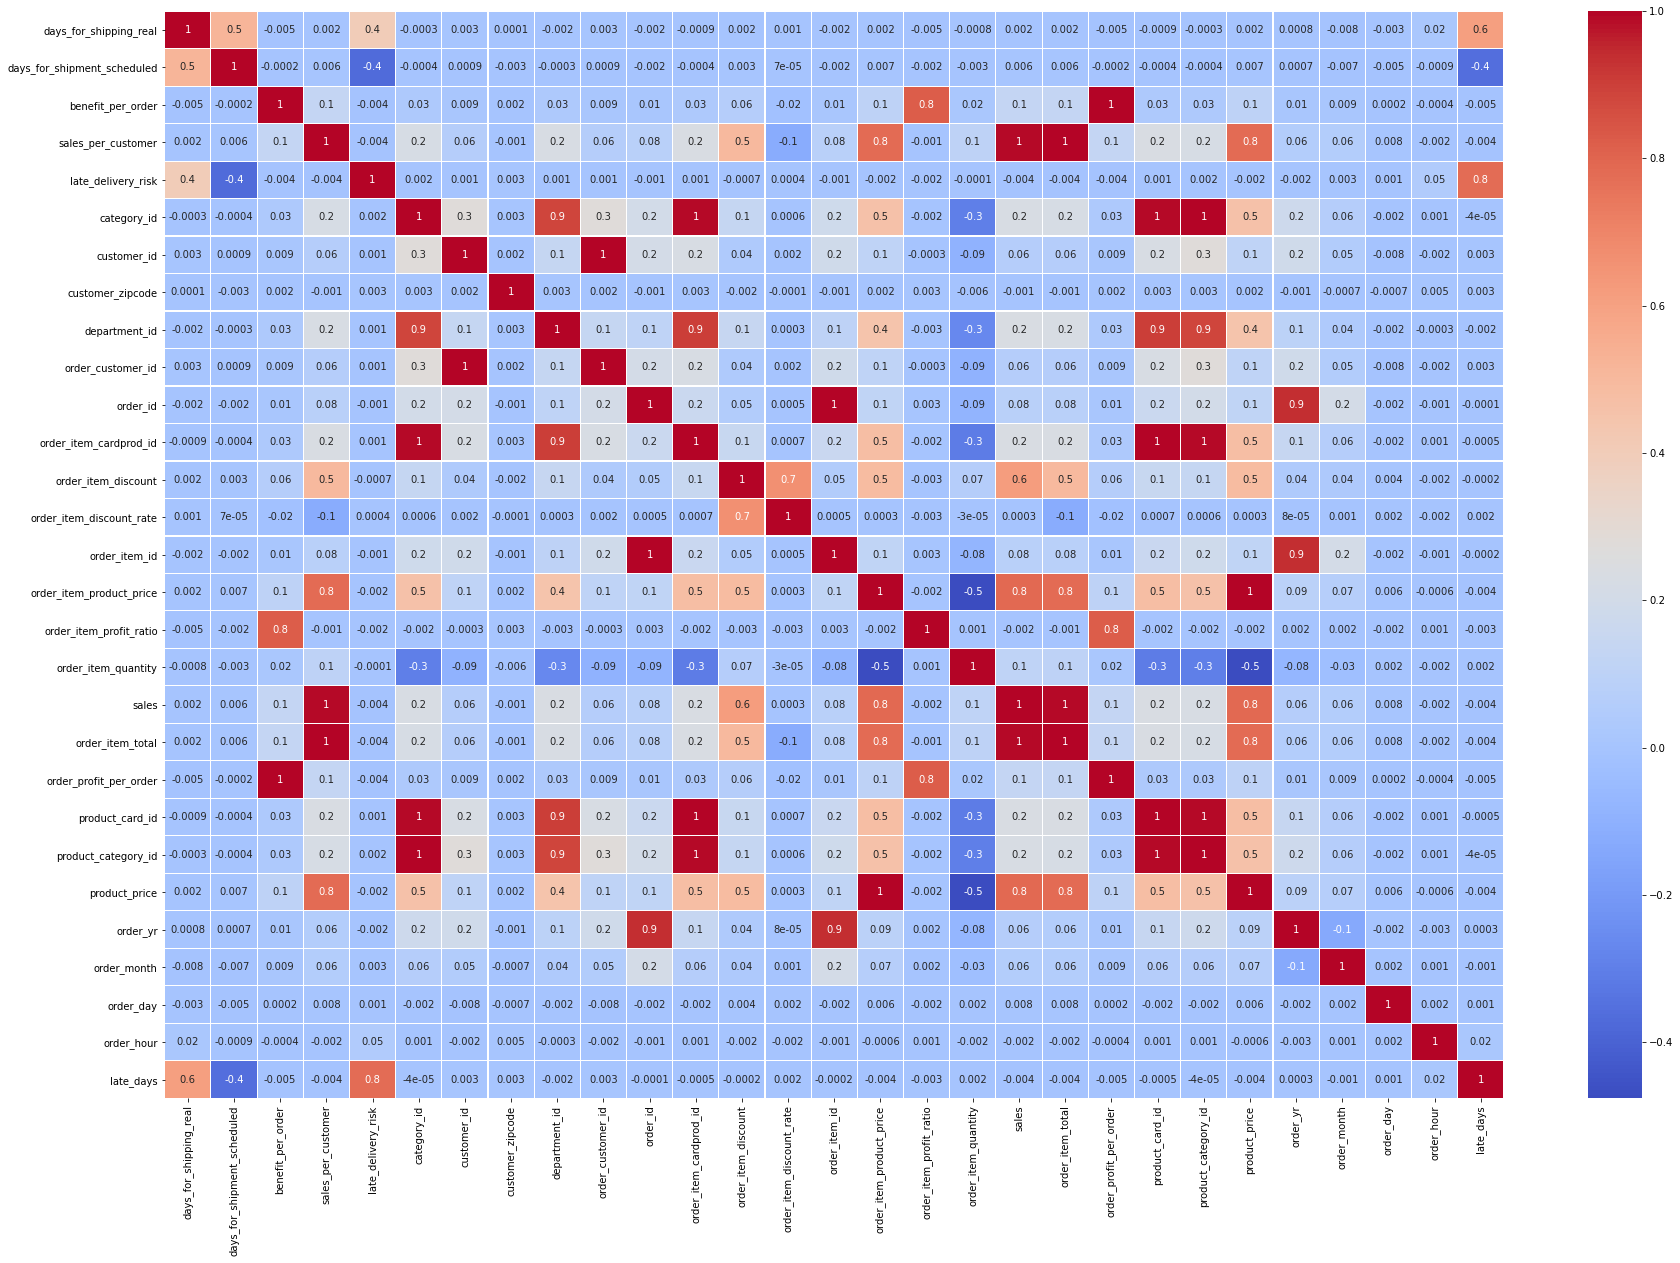

In [17]:
corrmap = df.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(df[top].corr(),linewidths=.1,annot=True,fmt='.1g',cmap="coolwarm")

Observations:
- `benefit_per_order` and `order_profit_per_order` are highly correlated.
- `sales_per_customer`, `sales`, and `order_item_total` exhibit strong correlations.
- There are identical values between columns:
  - `category_id`, `product_category_id`, `order_customer_id`, `order_item_cardprod_id`, and `product_card_id`.
  - `order_item_product_price` and `product_price`.

<AxesSubplot:>

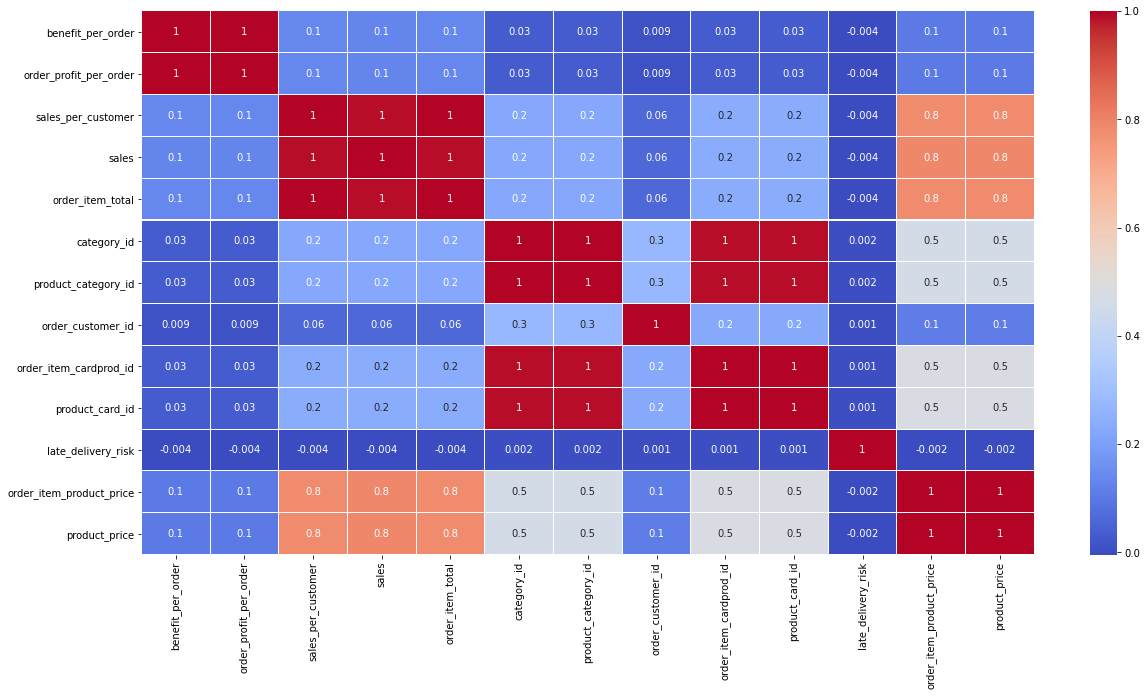

In [18]:
SC_features=df[['benefit_per_order', 'order_profit_per_order', 'sales_per_customer','sales', 'order_item_total',
       'category_id', 'product_category_id', 'order_customer_id', 'order_item_cardprod_id', 'product_card_id','late_delivery_risk','order_item_product_price','product_price']]
fig = plt.figure(figsize=(20,10))
sns.heatmap(SC_features.corr(), linewidths=.1,annot=True,fmt='.1g',  cmap = "coolwarm")

### Order Origin

The bar plot above illustrates the distribution of order origins by country, displaying the top 15 countries with the highest number of orders.


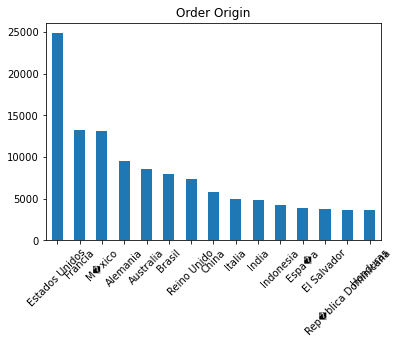

In [19]:
#Check Order Country and Market
top_15_countries = df['order_country'].value_counts().nlargest(15)
top_15_countries.plot(kind='bar', title="Order Origin")
plt.xticks(rotation=45)
plt.show()

### Distribution of Order Types

The bar plot above displays the distribution of different order types within the dataset.


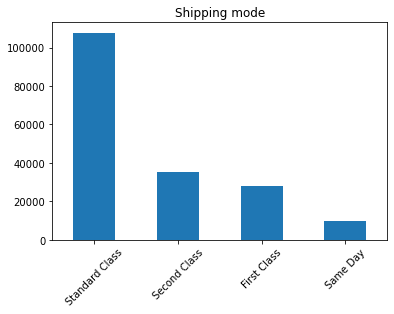

In [20]:
shipping_mode = df['shipping_mode'].value_counts()
shipping_mode.plot(kind='bar', title="Shipping mode")
plt.xticks(rotation=45)
plt.show()

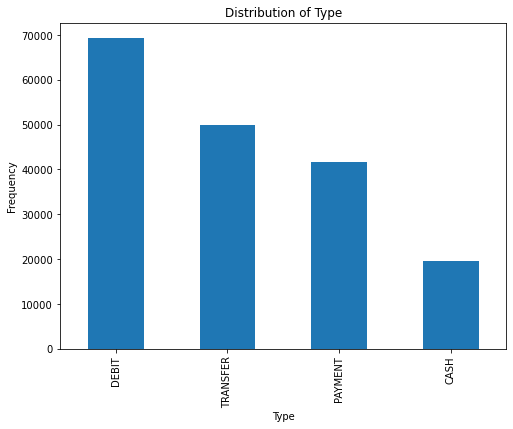

In [21]:
df['type'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

### Proportion of Delivery Status Pie Chart: 
  The pie chart illustrates the distribution of delivery statuses across the dataset. 

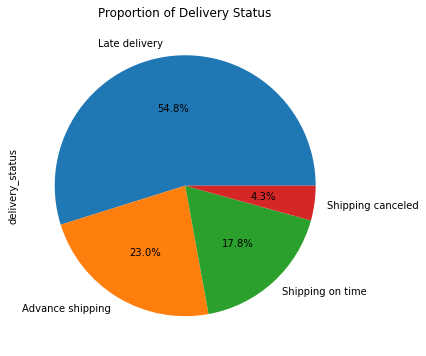

In [22]:
#Check proportion of Late Delivery 
df['delivery_status'].value_counts().plot.pie(figsize=(8, 6), autopct='%1.1f%%' )
plt.title('Proportion of Delivery Status')
plt.show()


### Proportion of Late Delivery Risk Pie Chart:
   This pie chart represents the proportion of late delivery risks in the dataset.

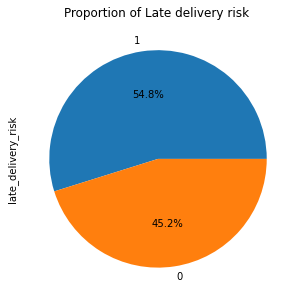

In [227]:
df['late_delivery_risk'].value_counts().plot.pie( figsize=(8, 5),autopct='%1.1f%%' )
plt.title('Proportion of Late delivery risk ')
plt.show()

Considering both charts, it appears that they convey redundant information. Hence, either one of them can be used for prediction purposes. we will use 2nd one 

### Shipping Mode vs. Delivery Risk

The count plot below illustrates the relationship between shipping modes and their associated late delivery risk.


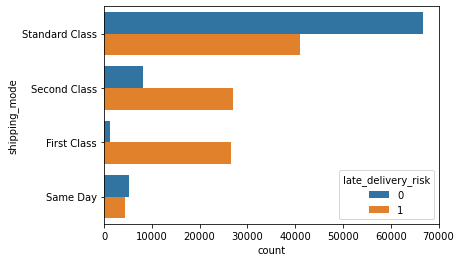

In [24]:
#Shipping Mode vs Delivery Risk
data=df
data.groupby(['shipping_mode', 'late_delivery_risk'])['type'].count()
ax = sns.countplot(y = 'shipping_mode',
                   hue = 'late_delivery_risk',
                   data = data,
                   order=data['shipping_mode'].value_counts(ascending=False).index);
plt.show()

### Order Status vs. Delivery Risk

The count plot below depicts the relationship between order statuses and their associated late delivery risk.


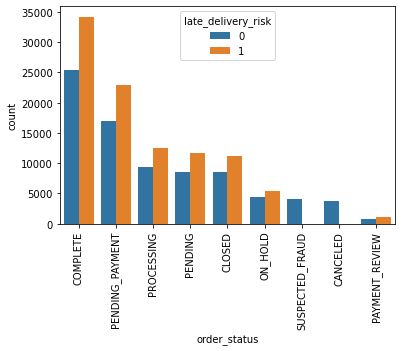

In [25]:
#order_status vs Delivery Risk
data.groupby(['order_status', 'late_delivery_risk'])['type'].count()
ax = sns.countplot(x = 'order_status',
                   hue = 'late_delivery_risk',
                   data = data,
                   order=data['order_status'].value_counts(ascending=False).index);
plt.xticks(rotation=90)
plt.show()


### Customer Segment vs. Delivery Risk

The count plot below displays the relationship between customer segments and their associated late delivery risk.


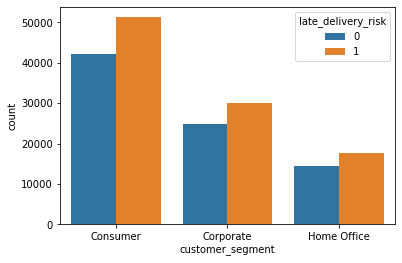

In [26]:
#Customer Segment vs Delivery Risk
data.groupby(['customer_segment', 'late_delivery_risk'])['type'].count()
ax = sns.countplot(x = 'customer_segment',
                   hue = 'late_delivery_risk',
                   data = data,
                   order=data['customer_segment'].value_counts(ascending=False).index);
plt.show()


### Type vs. Delivery Risk

The count plot below illustrates the relationship between different types of orders and their associated late delivery risk.


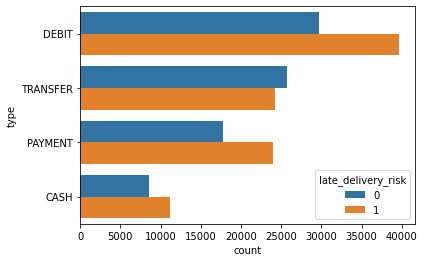

In [27]:
 #Type vs Delivery Risk
    data.groupby(['type', 'late_delivery_risk'])['type'].count()
    ax = sns.countplot(y = 'type',
                       hue = 'late_delivery_risk',
                       data = data,
                       order=data['type'].value_counts(ascending=False).index);

### Distribution of Customer State

The bar plot below shows the frequency distribution of customers across different states.


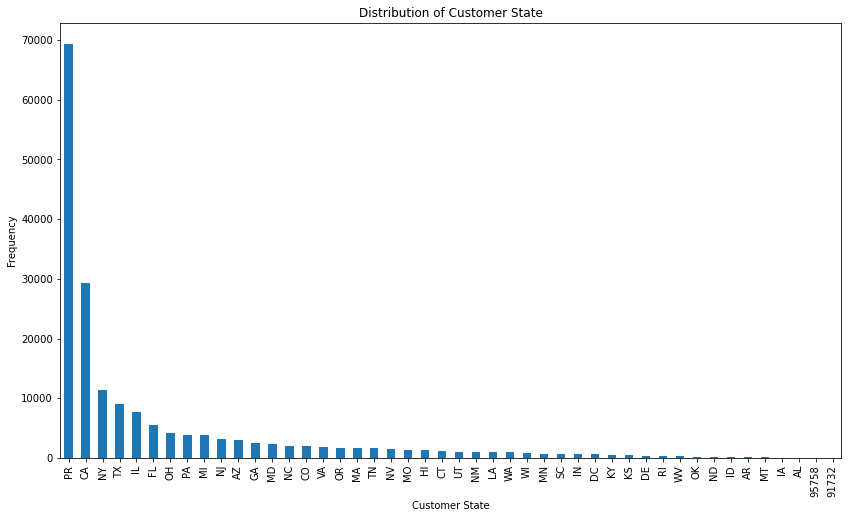

In [234]:
df['customer_state'].value_counts().plot(kind='bar', figsize=(14, 8))
plt.title('Distribution of Customer State')
plt.xlabel('Customer State')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### Department Distribution Pie Chart

The pie chart above illustrates the distribution of orders across different departments.


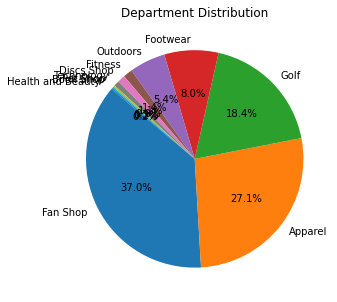

In [29]:
department_counts = df['department_name'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Department Distribution")
plt.show()

In [30]:
train_df = df.copy()
train_df.dtypes

type                            object
days_for_shipping_real           int64
days_for_shipment_scheduled      int64
benefit_per_order              float64
sales_per_customer             float64
delivery_status                 object
late_delivery_risk               int64
category_id                      int64
category_name                   object
customer_city                   object
customer_country                object
customer_id                      int64
customer_segment                object
customer_state                  object
customer_zipcode               float64
department_id                    int64
department_name                 object
market                          object
order_city                      object
order_country                   object
order_customer_id                int64
order_id                         int64
order_item_cardprod_id           int64
order_item_discount            float64
order_item_discount_rate       float64
order_item_id            

### Conversion of Categorical Features to Numerical Labels

Categorical features have been encoded into numerical labels using LabelEncoder to prepare the data for algorithm.


In [31]:
# converting categorical (object) to numbers
label_encoder = LabelEncoder()
columns_to_encode = ['type'
 , 'category_name'
 , 'customer_city'
 , 'customer_country'
 , 'customer_segment'
 , 'customer_state'
 ,'delivery_status'
 , 'department_name'
 , 'market'
 , 'order_city'
 , 'order_country'
 , 'order_region'
 , 'order_state'
 , 'order_status'
 , 'product_name'
 , 'shipping_mode']
for column in columns_to_encode:
    train_df[column] = label_encoder.fit_transform(train_df[column])

In [32]:
#Drop "days_for_shipping_real", "days_for_shipment_scheduled" as already created late_days column
train_df.drop(["days_for_shipping_real", "days_for_shipment_scheduled", "delivery_status"],axis=1,inplace=True)

### Feature Selection using ANOVA F-test

We used `SelectKBest` with ANOVA F-test (`f_classif`) to select the top 10 most relevant features for predicting `late_delivery_risk`. This method identifies features with the highest statistical significance.


In [235]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target variable (y)
X_s = train_df.drop(columns=['late_delivery_risk'])  # Features
y_s = train_df['late_delivery_risk']  # Target variable

# For numerical features (ANOVA)
selector_anova = SelectKBest(score_func=f_classif, k=10) # selecting 10 best fetures using this feture engineering   
X_anova = selector_anova.fit_transform(X_s, y_s)
selected_features_anova = selector_anova.get_support(indices=True)
# Get the names of the selected features
selected_feature_names_anova = X_s.columns[selected_features_anova]
print("Selected features (ANOVA):", selected_feature_names_anova)

Selected features (ANOVA): Index(['type', 'customer_city', 'order_city', 'order_item_total',
       'order_region', 'order_status', 'product_name', 'shipping_mode',
       'order_hour', 'late_days'],
      dtype='object')


In [156]:
X = train_df[['type', 'customer_city', 'order_city', 'order_item_total',
       'order_region', 'order_status', 'product_name', 'shipping_mode',
       'order_hour', 'late_days']]
y= train_df['late_delivery_risk']

### Train-Test Split

The dataset has been split into training and testing sets with a test size of 30% and a random state of 50 for reproducibility.


In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =50)

### Standard Scaling

The features in the training and testing sets have been scaled using StandardScaler to standardize their values.


In [213]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)

In [214]:
X_train_s

array([[ 0.32976589, -0.79489871,  1.6684564 , ..., -2.02500428,
         1.08824688,  0.29061444],
       [ 1.33495725, -0.79489871,  0.15371025, ..., -0.21078525,
        -0.21140497,  1.63236029],
       [ 1.33495725,  1.81582307, -0.70275372, ..., -2.02500428,
         0.36621808,  0.29061444],
       ...,
       [-0.67542546,  1.87798311, -1.55822179, ...,  0.69632427,
         0.6550296 ,  0.96148737],
       [ 1.33495725, -0.79489871,  0.39471523, ..., -2.02500428,
         1.52146417,  0.29061444],
       [ 0.32976589,  0.72180632,  0.38973578, ...,  0.69632427,
        -1.65546259, -0.38025848]])

In [215]:
print("X train :",X_train.shape)
print("y train :",y_train.shape,"\n")
print("X test :",X_test.shape)
print("y test :",y_test.shape)


X train : (126363, 10)
y train : (126363,) 

X test : (54156, 10)
y test : (54156,)


### Training Neural Network

A neural network classifier with 5 hidden nodes has been trained using the logistic activation function and the LBFGS solver algorithm.


In [248]:
clf = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs',random_state=1)
clf.fit(X_train_s, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=5, random_state=1,
              solver='lbfgs')

### Confusion Matrix for Training Data

The confusion matrix displays the model's predictions compared to the true labels for the training data.


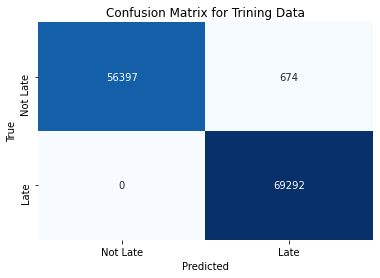

In [249]:
#Confusion Matrix for Trining Data
cm = confusion_matrix(y_train, clf.predict(X_train_s))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Late', 'Late'], yticklabels=['Not Late', 'Late'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Trining Data')
plt.show()

In [250]:
# Compute classification metrics
acc_t = accuracy_score(y_train, clf.predict(X_train_s))
pre_t = precision_score(y_train, clf.predict(X_train_s))
rec_t = recall_score(y_train, clf.predict(X_train_s))
f1_t = f1_score(y_train, clf.predict(X_train_s))

# Print classification metrics
print("Accuracy of Training data:", f'{acc_t*100:.2f}%')
print("Precision of Training data:", f'{pre_t*100:.2f}%')
print("Recall of Training data:", f'{rec_t*100:.2f}%')
print("F1-score of Training data:", f'{f1_t*100:.2f}%')

Accuracy of Training data: 99.47%
Precision of Training data: 99.04%
Recall of Training data: 100.00%
F1-score of Training data: 99.52%


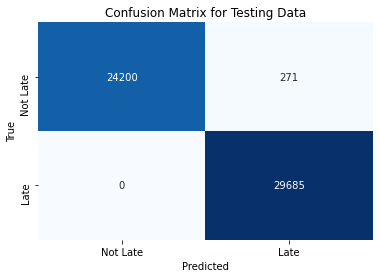

In [251]:
#Confusion Matrix for Testing Data
cm = confusion_matrix(y_test, clf.predict(X_test_s))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Late', 'Late'], yticklabels=['Not Late', 'Late'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Testing Data')
plt.show()

In [254]:
# Compute classification metrics
accuracy = accuracy_score(y_test, clf.predict(X_test_s))
precision = precision_score(y_test, clf.predict(X_test_s))
rec = recall_score(y_test, clf.predict(X_test_s))
f1 = f1_score(y_test, clf.predict(X_test_s))

# Print classification metrics
print("Accuracy of Testing data:", f'{accuracy*100:.2f}%')
print("Precision of Testing data:", f'{precision*100:.2f}%')
print("Recall of Testing data:", f'{rec*100:.2f}%')
print("F1-score of Testing data:", f'{f1*100:.2f}%')

Accuracy of Testing data: 99.50%
Precision of Testing data: 99.10%
Recall of Testing data: 100.00%
F1-score of Testing data: 99.55%
